In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import joblib



df = pd.read_csv('df_casos.csv')
df_rutas = pd.read_csv('rutas_final.csv')

df

,usuario,genero,edad,region,trabajo,musica,tarde_libre,vacaciones,mobilidad_reducida,ruta,longitud_ruta,sector,valoracion
0,0,mujer,adulto,north america,trabajador,clasica,sofa,aventura,no,3,8200,"[natura, gastronomia, bienestar]",4
1,1,mujer,adulto,europe,jubilado,reggeaton,playa,aventura,no,7,2600,"[educacion, gastronomia]",2
2,2,hombre,joven,europe,nada,clasica,montaña,cultura,no,10,3400,"[natura, gastronomia, comercio_local]",3
3,3,prefiero no decirlo,adulto,asia,estudiante,pop,sofa,ocio,no,11,5000,"[deporte, gastronomia, oci]",4
4,4,mujer,adulto,europe,trabajador,pop,playa,ocio,no,14,5700,"[cultura, gastronomia, comercio_local]",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,hombre,adulto,north america,trabajador,pop,montaña,ocio,no,12,2100,"[cultura, educacion]",5
496,496,hombre,adulto,asia,trabajador,techno,montaña,aventura,si,5,3900,"[comercio_local, gastronomia]",4
497,497,hombre,joven,europe,estudiante,techno,montaña,cultura,no,13,6000,"[cultura, gastronomia, comercio_local]",1
498,498,mujer,adulto,asia,trabajador,clasica,playa,cultura,si,0,5920,"[cultura, gastronomia, natura, oci]",4


In [9]:
df_cluster = df
for x in range(len(df_cluster)):
    df_cluster['sector'].iloc[x] = df_cluster['sector'].iloc[x].strip('][').split(', ')

print(df_cluster)

     usuario               genero    edad         region     trabajo  \
0          0                mujer  adulto  north america  trabajador   
1          1                mujer  adulto         europe    jubilado   
2          2               hombre   joven         europe        nada   
3          3  prefiero no decirlo  adulto           asia  estudiante   
4          4                mujer  adulto         europe  trabajador   
..       ...                  ...     ...            ...         ...   
495      495               hombre  adulto  north america  trabajador   
496      496               hombre  adulto           asia  trabajador   
497      497               hombre   joven         europe  estudiante   
498      498                mujer  adulto           asia  trabajador   
499      499                mujer   joven           asia  estudiante   

        musica tarde_libre vacaciones mobilidad_reducida  ruta  longitud_ruta  \
0      clasica        sofa   aventura                 

C:\Users\dancv\AppData\Local\Temp\ipykernel_5096\21641143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['sector'].iloc[x] = df_cluster['sector'].iloc[x].strip('][').split(', ')
C:\Users\dancv\AppData\Local\Temp\ipykernel_5096\21641143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['sector'].iloc[x] = df_cluster['sector'].iloc[x].strip('][').split(', ')
C:\Users\dancv\AppData\Local\Temp\ipykernel_5096\21641143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [10]:
import CONST
def dummy(df,col,prefix): 
    df = df.copy()
    for case in range(len(df)):
        if col == 'sector':
            for categoria in CONST.categorias_rutas:
                if categoria in df[col].iloc[case]:
                    df[prefix + str(categoria)] = 1
                else:
                    df[prefix + str(categoria)] = 0
        elif col == 'longitud_ruta':
            if int(df[col].iloc[case]) < 2000:
                df[col].iloc[case] = CONST.longitud_ruta[0]
            elif int(df[col].iloc[case]) > 7000:
                df[col].iloc[case] = CONST.longitud_ruta[2]
            else:
                df[col].iloc[case] = CONST.longitud_ruta[1]

    return df

In [11]:

df_cluster_dummies = pd.get_dummies(df_cluster, columns=['genero'], prefix='genero')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['edad'], prefix='edad')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['region'], prefix='region')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['trabajo'], prefix='trabajo')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['musica'], prefix='musica')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['tarde_libre'], prefix='tarde_libre')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['vacaciones'], prefix='vacaciones')
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['mobilidad_reducida'], prefix='mobilidad_reducida')
df_cluster_dummies = dummy(df_cluster_dummies, 'longitud_ruta',prefix=None)
df_cluster_dummies = pd.get_dummies(df_cluster_dummies, columns=['longitud_ruta'], prefix='longitud_ruta')

df_cluster_dummies = dummy(df_cluster_dummies, 'sector', 'sector_')
df_cluster_dummies = df_cluster_dummies.drop(columns='sector')

df_cluster_dummies = df_cluster_dummies.astype(int)

df_cluster_dummies_final = df_cluster_dummies
df_cluster_dummies

C:\Users\dancv\AppData\Local\Temp\ipykernel_5096\1170435403.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].iloc[case] = CONST.longitud_ruta[2]
C:\Users\dancv\AppData\Local\Temp\ipykernel_5096\1170435403.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'larga' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df[col].iloc[case] = CONST.longitud_ruta[2]


,usuario,ruta,valoracion,genero_hombre,genero_mujer,genero_prefiero no decirlo,edad_adulto,edad_joven,edad_niño,region_africa,...,longitud_ruta_larga,longitud_ruta_media,sector_ocio,sector_cultura,sector_deporte,sector_comercio local,sector_gastronomia,sector_natura,sector_educacion,sector_bienestar
0,0,3,4,0,1,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,7,2,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,2,10,3,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
3,3,11,4,0,0,1,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,4,14,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,12,5,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
496,496,5,4,1,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
497,497,13,1,1,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
498,498,0,4,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [13]:
df_cluster_dummies = df_cluster_dummies.drop(columns=['usuario','ruta','valoracion','longitud_ruta_corta',
       'longitud_ruta_larga', 'longitud_ruta_media', 'sector_bienestar',
       'sector_comercio local', 'sector_cultura', 'sector_deporte',
       'sector_educacion', 'sector_gastronomia', 'sector_natura',
       'sector_ocio'])

df_cluster_dummies

,genero_hombre,genero_mujer,genero_prefiero no decirlo,edad_adulto,edad_joven,edad_niño,region_africa,region_asia,region_europe,region_north america,...,musica_techno,tarde_libre_bar,tarde_libre_montaña,tarde_libre_playa,tarde_libre_sofa,vacaciones_aventura,vacaciones_cultura,vacaciones_ocio,mobilidad_reducida_no,mobilidad_reducida_si
0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,0,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
3,0,0,1,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,1,0
4,0,1,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,1,0
496,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
497,1,0,0,0,1,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
498,0,1,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1


# Aplicar primero un PCA

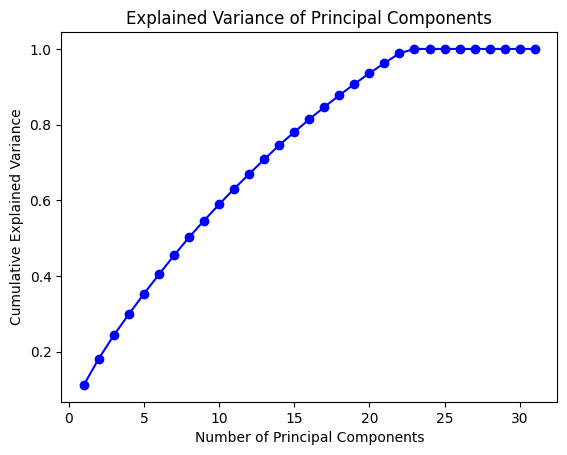

In [14]:
all_features = df_cluster_dummies.columns

features = df_cluster_dummies[all_features]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA()
principal_components = pca.fit_transform(features_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b')
plt.title('Explained Variance of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


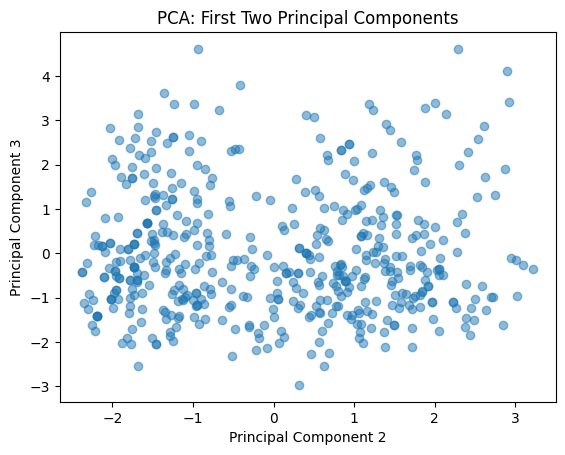

In [15]:
pca = PCA(n_components=17)
principal_components = pca.fit_transform(features_scaled)

plt.scatter(principal_components[:, 1], principal_components[:, 2], alpha=0.5)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 2')
plt.ylabel('Principal Component 3')
plt.show()

In [16]:
pca_df = pd.DataFrame(principal_components[:, :17], columns=[f'Component{i+1}' for i in range(17)], index=df_cluster_dummies.index)

df_cd_pca = pd.concat([df_cluster_dummies, pca_df], axis=1)

C:\Users\dancv\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


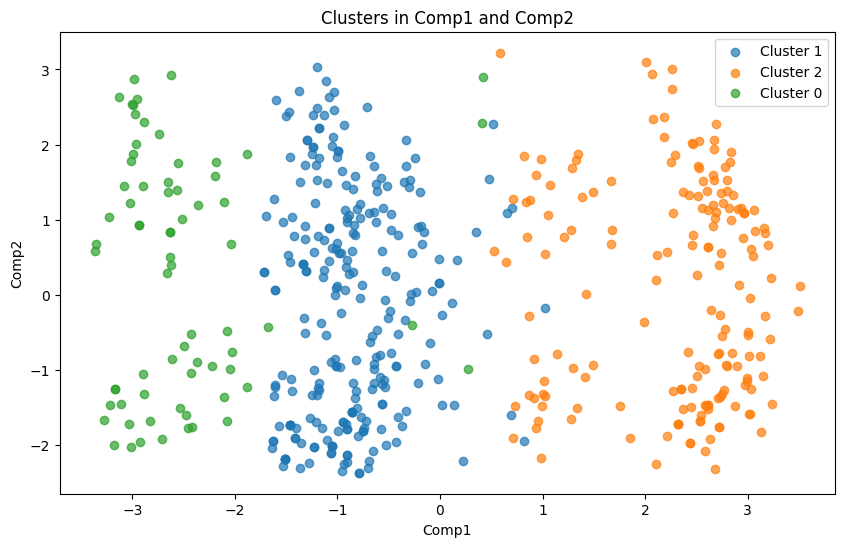

In [17]:
n_clusters = 3 
kmeans = KMeans(n_clusters=n_clusters, random_state=33)
df_cd_pca['cluster'] = kmeans.fit_predict(pca_df)

plt.figure(figsize=(10, 6))
for cluster_id in df_cd_pca['cluster'].unique():
    cluster_data = df_cd_pca[df_cd_pca['cluster'] == cluster_id]
    plt.scatter(cluster_data['Component1'], cluster_data['Component2'], label=f'Cluster {cluster_id}', alpha=0.7)

plt.title('Clusters in Comp1 and Comp2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.legend()
plt.show()

In [18]:
df_cluster_dummies_final['cluster'] = df_cd_pca['cluster']

In [19]:
c0 = df_cluster_dummies_final[df_cluster_dummies_final['cluster']==0]
c1 = df_cluster_dummies_final[df_cluster_dummies_final['cluster']==1]
c2 = df_cluster_dummies_final[df_cluster_dummies_final['cluster']==2]
print(len(c0))
print(len(c1))

print(len(c2))

c0.to_csv('cluster_0.csv', index=False)
c1.to_csv('cluster_1.csv', index=False)
c2.to_csv('cluster_2.csv', index=False)


70
256
174


In [20]:
#guardar modelos
joblib.dump(scaler, 'scaler_model.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')
joblib.dump(pca, 'pca_model.joblib')



['pca_model.joblib']